In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras import backend as K

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
ytrain.shape

(60000,)

In [4]:
xtrain[0].shape

(28, 28)

### to flatten the images

In [5]:
X_train = xtrain.reshape(60000, 784)
X_test = xtest.reshape(10000, 784)

In [6]:
X_train[0].shape

(784,)

In [7]:
K.clear_session()

In [8]:
model = Sequential([
                    Dense(units=10, activation='sigmoid', input_shape=X_train[0].shape),
                    Dense(units=10, activation='softmax')

])

In [9]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics='Precision'
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


### We need to define labels as categorical feature using 'from tensorflow.keras.utils import to_categorical'

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [13]:
y_train.shape

(60000, 10)

# Plot a histogram of the network weights before training

In [14]:
hidden = model.get_layer('dense')
output = model.get_layer('dense_1')

In [15]:
weigths_hid, biases_hid = hidden.get_weights()
weigths_out, biases_out = output.get_weights()

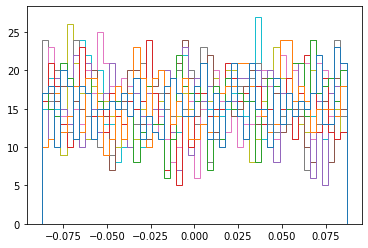

In [17]:
plt.hist(weigths_hid, bins=50, histtype='step')
plt.show() 

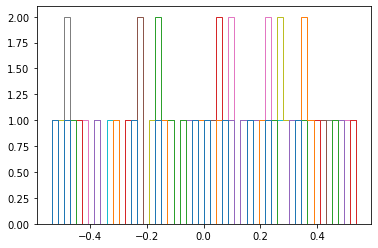

In [18]:
plt.hist(weigths_out, bins=50, histtype='step')
plt.show()

# Fit the model

In [19]:
model.fit(X_train,y_train, epochs = 5, batch_size = 15, verbose = 1, validation_split=0.2)

Epoch 1/5
3200/3200 [==============================] - 10s 3ms/step - loss: 1.2269 - precision: 0.9097 - val_loss: 0.7808 - val_precision: 0.9153
Epoch 2/5
3200/3200 [==============================] - 11s 3ms/step - loss: 0.7629 - precision: 0.8787 - val_loss: 0.6875 - val_precision: 0.8792
Epoch 3/5
3200/3200 [==============================] - 10s 3ms/step - loss: 0.6440 - precision: 0.8777 - val_loss: 0.5685 - val_precision: 0.8863
Epoch 4/5
3200/3200 [==============================] - 11s 3ms/step - loss: 0.6079 - precision: 0.8708 - val_loss: 0.5649 - val_precision: 0.8816
Epoch 5/5
3200/3200 [==============================] - 11s 3ms/step - loss: 0.5880 - precision: 0.8707 - val_loss: 0.6008 - val_precision: 0.8603


# Plot a histogram of the network weights after training

In [20]:
hidden = model.get_layer('dense')
output = model.get_layer('dense_1')

In [21]:
weigths_hid, biases_hid = hidden.get_weights()
weigths_out, biases_out = output.get_weights()

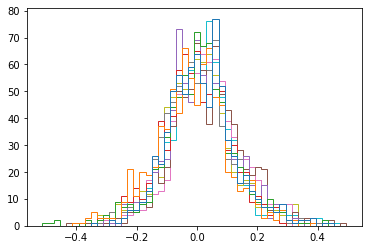

In [23]:
plt.hist(weigths_hid, bins=50, histtype='step')
plt.show()

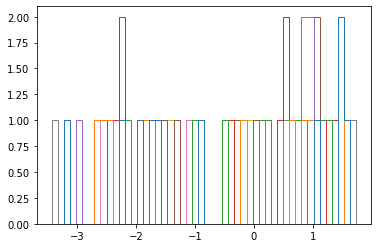

In [24]:
plt.hist(weigths_out, bins=50, histtype='step')
plt.show()